In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
res = pd.read_csv('/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/5__5_100_N_points_experiment_RGI60-13.19847.csv')

In [5]:
res

,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,run_10,run_11,run_12,run_13,run_14,run_15,run_16,run_17,run_18,run_19,run_20
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-5.848485,-6.519119,-6.570343,-6.900118,-6.820889,-7.115260,-7.028940,-6.972095,-6.945456,-7.054644,-6.804323,-6.931240,-7.081430,-7.094658,-7.134525,-7.101035,-7.108792,-7.077464,-7.066771,-7.071881
2,-11.521995,-12.898264,-13.043556,-13.703479,-13.520915,-14.110619,-13.934148,-13.829296,-13.770189,-13.986274,-13.489810,-13.735744,-14.030588,-14.061981,-14.141258,-14.066740,-14.064194,-14.012680,-13.991414,-14.000939
3,-15.230664,-17.328145,-17.768895,-18.762928,-18.483659,-19.401046,-19.150494,-18.977684,-18.891124,-19.236900,-18.475858,-18.834996,-19.266655,-19.315025,-19.443517,-19.325786,-19.320502,-19.248635,-19.217162,-19.230045
4,-16.392888,-19.570376,-20.211393,-21.496657,-21.163177,-22.448248,-22.109367,-21.882856,-21.764701,-22.232874,-21.237942,-21.690596,-22.242552,-22.302910,-22.474863,-22.329674,-22.315561,-22.224478,-22.185615,-22.204509
5,-15.797454,-20.156434,-21.071788,-22.533345,-22.146252,-23.778316,-23.395490,-23.136948,-22.994208,-23.535387,-22.380155,-22.930796,-23.551824,-23.619461,-23.811942,-23.659841,-23.621748,-23.505898,-23.468047,-23.491904
6,-16.481267,-21.571241,-22.751995,-24.301413,-23.818101,-25.659312,-25.273140,-24.997753,-24.852854,-25.417927,-24.187745,-24.813260,-25.446581,-25.507629,-25.715655,-25.568336,-25.513718,-25.364279,-25.331807,-25.355100
7,-11.532424,-16.688598,-17.913075,-19.424956,-18.862394,-20.750228,-20.378029,-20.118334,-19.988689,-20.518973,-19.335649,-19.962877,-20.536673,-20.581628,-20.794956,-20.660728,-20.617076,-20.450788,-20.424151,-20.445757
8,-10.296603,-15.440081,-16.668924,-18.159615,-17.583114,-19.465099,-19.101398,-18.846634,-18.722445,-19.242592,-18.078718,-18.701928,-19.258338,-19.299014,-19.511390,-19.381222,-19.339521,-19.173148,-19.147907,-19.169176
9,-11.060183,-16.135858,-17.336606,-18.737622,-18.192186,-20.077130,-19.731382,-19.490489,-19.361773,-19.866011,-18.727838,-19.338869,-19.881462,-19.925617,-20.127273,-19.999222,-19.952006,-19.794400,-19.768756,-19.790100


Text(0, 0.5, 'glacier_wide MB after 1 month')

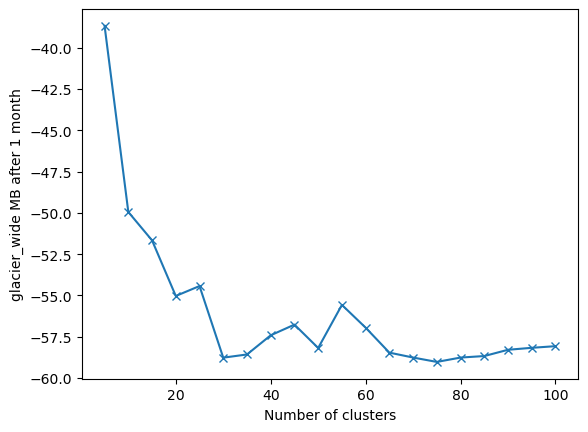

In [6]:
plt.plot(np.arange(5,105,5),res.iloc[-1].values,'x',ls='-')
plt.xlabel('Number of clusters')
plt.ylabel('glacier_wide MB after 1 month')

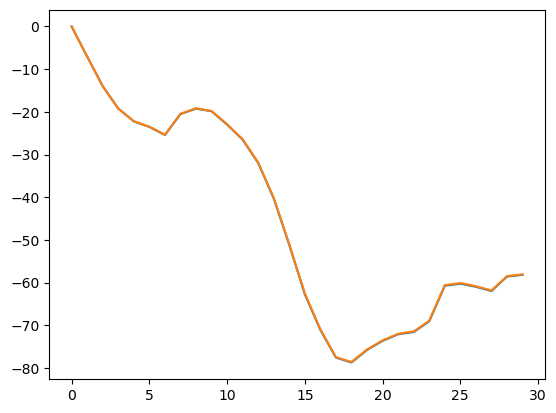

In [7]:
plt.plot(res['run_10'])
plt.plot(res['run_20'])

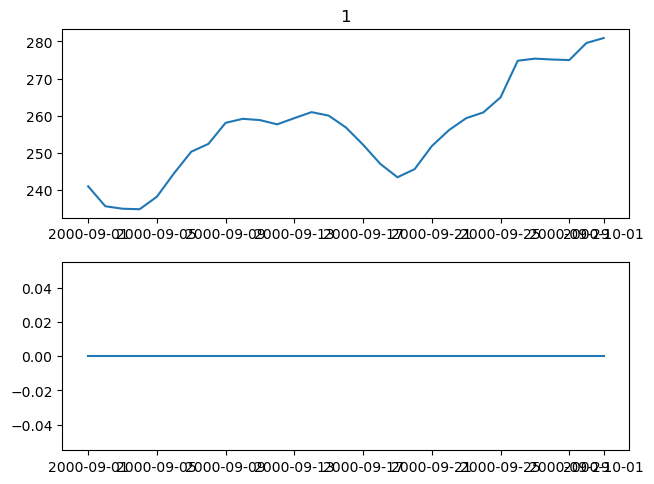

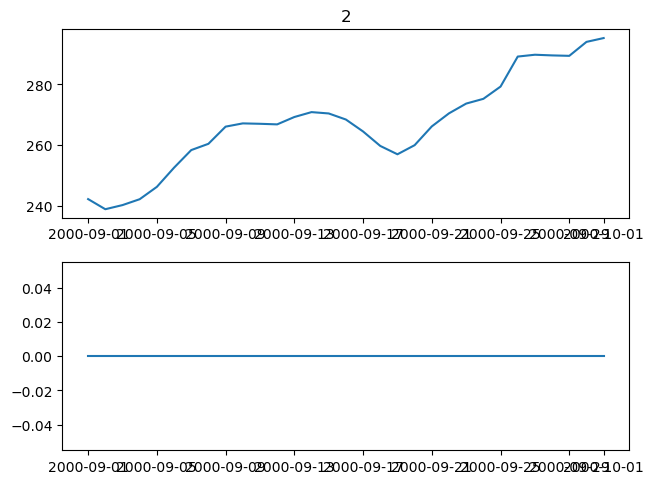

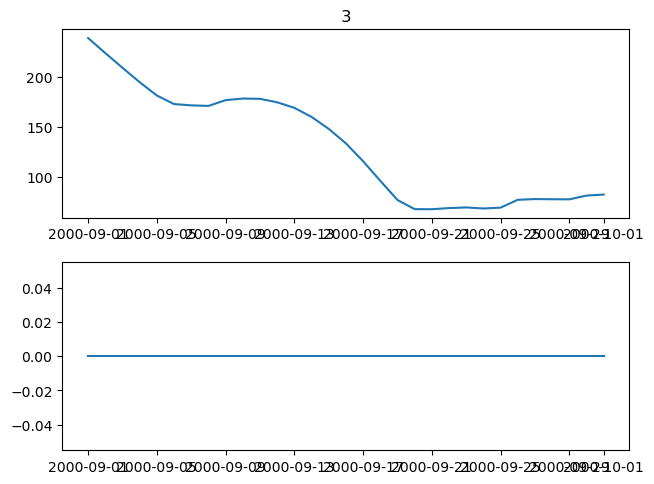

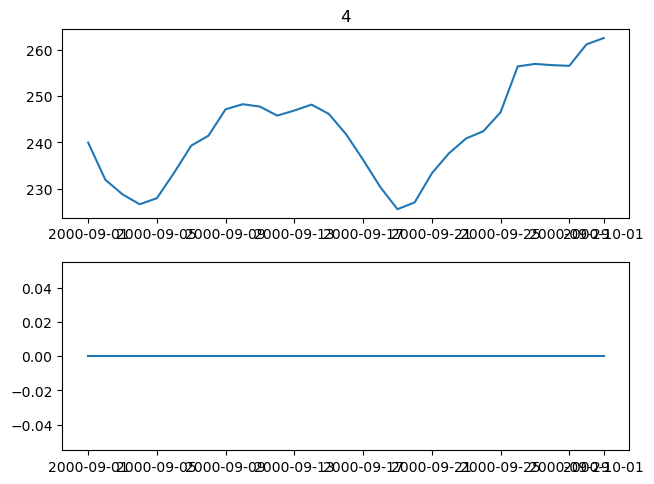

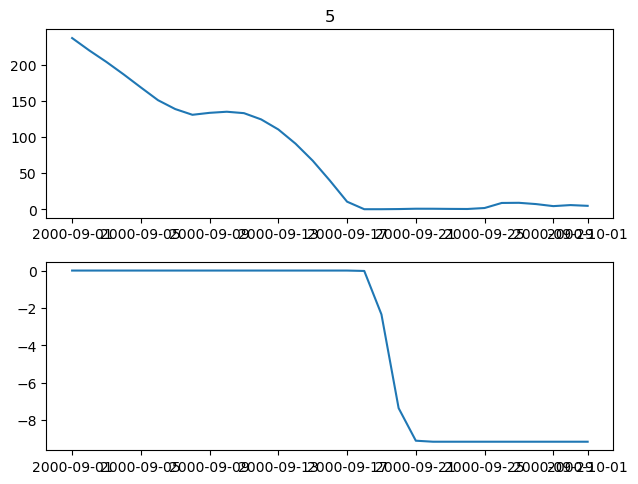

In [8]:
#####look at point by point
run_name = 5
for i in range(run_name):
    result = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{run_name}/{i+1}_results.parquet')
    fig,ax = plt.subplots(2,1)
    fig.tight_layout()
    ax[0].plot(result.Date,result.SWE)
    ax[1].plot(result.Date,result.ICE-result.ICE.iloc[0])
    ax[0].set_title(i+1)


In [37]:
###check weighting stategy works
#weights = [0.295871,0.163432,0.079678,0.198820,0.262198]
import datetime

mbs=[]

for run_name in np.arange(5,105,5):
    weights_missed=0
    
    weights_df = pd.read_csv(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{int(run_name)}/coords_out_RGI60-13.19847.csv',header=1)
    weights = np.array(weights_df.weight)
    
    for i in range(len(weights)):
        try:
            result = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{run_name}/{i+1}_results.parquet')

            date_start = result.Date.iloc[0]
            date_spin_complete = date_start + datetime.timedelta(days = 0)
            date_end =date_spin_complete + datetime.timedelta(days = 30)
            result = result[(result.Date>date_spin_complete)&(result.Date<=date_end)]

            if i==0:
                snow = (result.SWE-result.SWE.iloc[0])*weights[i]
                ice = (result.ICE-result.ICE.iloc[0])*weights[i]

            else:
                snow += (result.SWE-result.SWE.iloc[0])*weights[i]
                ice += (result.ICE-result.ICE.iloc[0])*weights[i]
        except FileNotFoundError:
            weights_missed += weights[i]
            print(weights_missed)
    mbs_rescaled = (snow+ice).iloc[-1]/(1-weights_missed)
    mbs.append(mbs_rescaled)
    
   



Text(0.5, 1.0, 'Response to N clusters: Whole glacier')

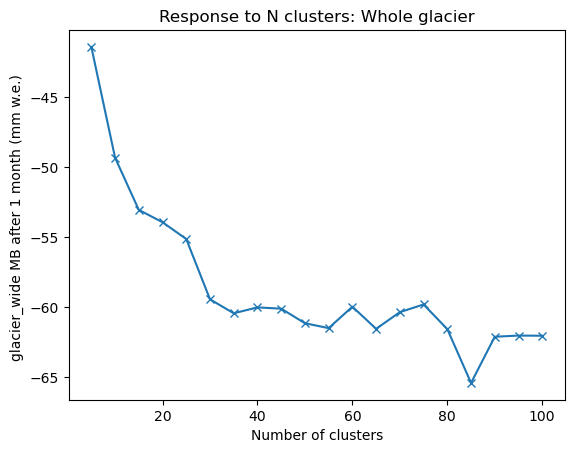

In [38]:
plt.plot(np.arange(5,105,5),mbs,'x',ls='-')
plt.xlabel('Number of clusters')
plt.ylabel('glacier_wide MB after 1 month (mm w.e.) ')
plt.title('Response to N clusters: Whole glacier')

In [39]:
weights_df

,x,y,deb_bool,weight,deb_thickness_m,elev_m,lat,lon
0,710512.517669,4.325573e+06,0,0.010185,0.000000,4434,39.053884,71.432786
1,709748.696468,4.324780e+06,0,0.010078,0.000000,5034,39.046927,71.423722
2,710982.561484,4.326748e+06,0,0.014581,0.000000,3934,39.064351,71.438578
3,709983.718376,4.324163e+06,0,0.008899,0.000000,4715,39.041316,71.426246
4,711188.205654,4.325808e+06,0,0.006755,0.000000,4169,39.055837,71.440661
...,...,...,...,...,...,...,...,...
95,709337.408129,4.329568e+06,1,0.020371,0.195192,3633,39.090138,71.420446
96,709014.253006,4.330185e+06,1,0.010936,0.518272,3596,39.095770,71.416903
97,708926.119790,4.330655e+06,1,0.011365,0.579543,3551,39.100023,71.416029
98,709719.318729,4.328246e+06,1,0.012437,0.332685,3740,39.078144,71.424451


In [ ]:
###########now lets look at debris and clean ice separately

import datetime

mbs=[]
num_points=[]
for run_name in np.arange(5,105,5):
    weights_missed=0
    
    weights_df = pd.read_csv(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{int(run_name)}/coords_out_RGI60-13.19847.csv',header=1)
    weights = np.array(weights_df[weights_df['deb_bool']==0].weight)

    num_points.append(len(weights))
    for i in range(len(weights)):

        try:
            result = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{run_name}/{i+1}_results.parquet')

            date_start = result.Date.iloc[0]
            date_spin_complete = date_start + datetime.timedelta(days = 0)
            date_end =date_spin_complete + datetime.timedelta(days = 30)
            result = result[(result.Date>date_spin_complete)&(result.Date<=date_end)]

            if i==0:
                snow = (result.SWE-result.SWE.iloc[0])*weights[i]
                ice = (result.ICE-result.ICE.iloc[0])*weights[i]

            else:
                snow += (result.SWE-result.SWE.iloc[0])*weights[i]
                ice += (result.ICE-result.ICE.iloc[0])*weights[i]
        except FileNotFoundError:
            weights_missed += weights[i]
            print(weights_missed)
    mbs_rescaled = (snow+ice).iloc[-1]/(1-weights_missed)
    mbs.append(mbs_rescaled)
    

Text(0.5, 1.0, 'Response to N clusters: clean ice')

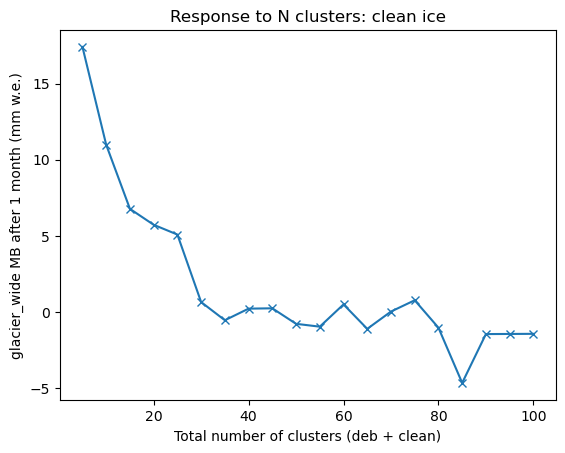

In [ ]:
plt.plot(num_points,mbs,'x',ls='-')
plt.xlabel('Total number of clusters (deb + clean)')
plt.ylabel('glacier_wide MB after 1 month (mm w.e.)')
plt.title('Response to N clusters: clean ice')

In [ ]:
###########now lets look at debris and clean ice separately

import datetime

mbs=[]
num_points=[]
for run_name in np.arange(5,105,5):
    weights_missed=0
    
    weights_df = pd.read_csv(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{int(run_name)}/coords_out_RGI60-13.19847.csv',header=1)
    weights = np.array(weights_df[weights_df['deb_bool']==1].weight)
    clean_points = len(weights_df[weights_df['deb_bool']==0])
    num_points.append(len(weights))
    for i in range(len(weights)):
        try:
            result = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{run_name}/{i+1+clean_points}_results.parquet')

            date_start = result.Date.iloc[0]
            date_spin_complete = date_start + datetime.timedelta(days = 0)
            date_end =date_spin_complete + datetime.timedelta(days = 30)
            result = result[(result.Date>date_spin_complete)&(result.Date<=date_end)]

            if i==0:
                snow = (result.SWE-result.SWE.iloc[0])*weights[i]
                ice = (result.ICE-result.ICE.iloc[0])*weights[i]

            else:
                snow += (result.SWE-result.SWE.iloc[0])*weights[i]
                ice += (result.ICE-result.ICE.iloc[0])*weights[i]
        except FileNotFoundError:
            weights_missed += weights[i]
            print(weights_missed)
    mbs_rescaled = (snow+ice).iloc[-1]/(1-weights_missed)
    mbs.append(mbs_rescaled)
    

Text(0.5, 1.0, 'Response to N clusters: debris covered')

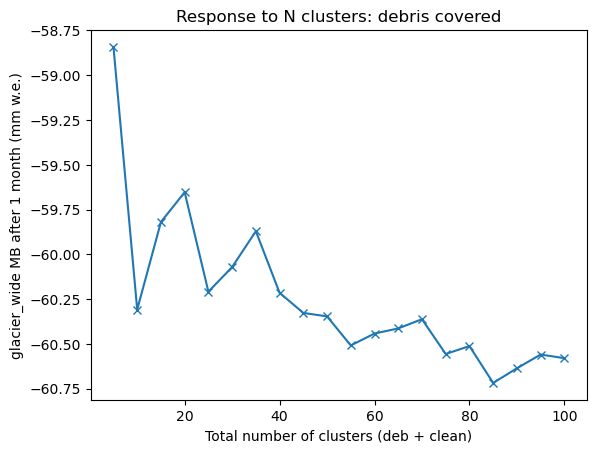

In [ ]:
plt.plot(num_points,mbs,'x',ls='-')
plt.xlabel('Total number of clusters (deb + clean)')
plt.ylabel('glacier_wide MB after 1 month (mm w.e.)')
plt.title('Response to N clusters: debris covered')